In [2]:
import tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Dataset
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jonathanoheix/face-expression-recognition-dataset")

print("Path to dataset files:", path)


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\Skynet\.cache\kagglehub\datasets\jonathanoheix\face-expression-recognition-dataset\versions\1


<h1 style="color: #ab5bb0">Ucitavanje podataka: - Originalni dataset</h1>

In [4]:
# train_val_data_dir = r'..\images\train'
train_val_data_dir = path + r'\images\train'
img_height = 48
img_width = 48
batch_size = 128

# train DS
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_val_data_dir,
    labels='inferred',  # subfolderi - labele
    label_mode='categorical',   # labele - kao one hot encod
    validation_split=0.2, 
    subset = 'training',
    seed = 123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
    #interpolation='bilinear'
)

train_class_names = train_ds.class_names
print(train_class_names)  

# validation DS (20%)
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_val_data_dir,
    labels='inferred',
    label_mode='categorical',     
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
)

val_class_names = val_ds.class_names
print(val_class_names) 


# test DS
# test_data_dir = r'..\images\test'
test_data_dir = path + r'\images\validation'
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    labels='inferred',       
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=True
)

test_class_names = test_ds.class_names
print(test_class_names)


Found 28821 files belonging to 7 classes.
Using 23057 files for training.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Found 28821 files belonging to 7 classes.
Using 5764 files for validation.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Found 7066 files belonging to 7 classes.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [5]:
def count_labels_with_percentage(dataset, class_names):
    counts = dict.fromkeys(class_names, 0)
    total = 0
    
    for _, labels in dataset:
        indices = np.argmax(labels, axis=1)
        for i in indices:
            counts[class_names[i]] += 1
        total += len(indices)
    percentages = {cls: f"{(counts[cls]/total)*100:.2f}%" for cls in class_names}
    
    return counts, percentages


train_counts, train_perc = count_labels_with_percentage(train_ds, train_ds.class_names)
val_counts, val_perc = count_labels_with_percentage(val_ds, val_ds.class_names)
test_counts, test_perc = count_labels_with_percentage(test_ds, test_ds.class_names)

print("Train dataset counts:", train_counts)
print("Train dataset %:", train_perc)

print("\nValidation dataset counts:", val_counts)
print("Validation dataset %:", val_perc)

print("\nTest dataset counts:", test_counts)
print("Test dataset %:", test_perc)


Train dataset counts: {'angry': 3229, 'disgust': 341, 'fear': 3294, 'happy': 5765, 'neutral': 3941, 'sad': 3935, 'surprise': 2552}
Train dataset %: {'angry': '14.00%', 'disgust': '1.48%', 'fear': '14.29%', 'happy': '25.00%', 'neutral': '17.09%', 'sad': '17.07%', 'surprise': '11.07%'}

Validation dataset counts: {'angry': 764, 'disgust': 95, 'fear': 809, 'happy': 1399, 'neutral': 1041, 'sad': 1003, 'surprise': 653}
Validation dataset %: {'angry': '13.25%', 'disgust': '1.65%', 'fear': '14.04%', 'happy': '24.27%', 'neutral': '18.06%', 'sad': '17.40%', 'surprise': '11.33%'}

Test dataset counts: {'angry': 960, 'disgust': 111, 'fear': 1018, 'happy': 1825, 'neutral': 1216, 'sad': 1139, 'surprise': 797}
Test dataset %: {'angry': '13.59%', 'disgust': '1.57%', 'fear': '14.41%', 'happy': '25.83%', 'neutral': '17.21%', 'sad': '16.12%', 'surprise': '11.28%'}


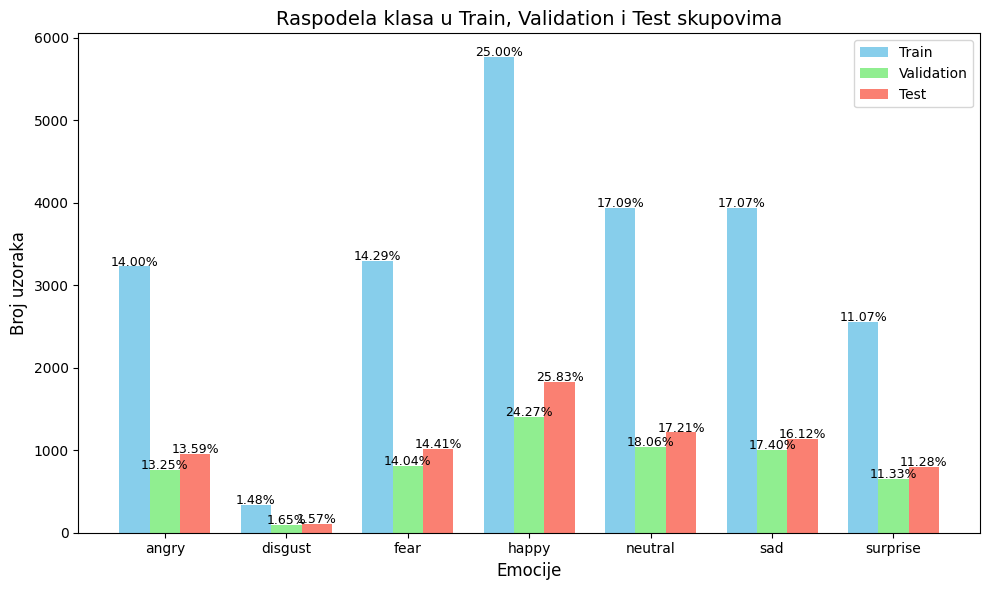

In [6]:
import matplotlib.pyplot as plt
import numpy as np

emotions = train_ds.class_names

train_values = [train_counts[cls] for cls in emotions]
val_values   = [val_counts[cls] for cls in emotions]
test_values  = [test_counts[cls] for cls in emotions]

train_perc_values = [train_perc[cls] for cls in emotions]
val_perc_values   = [val_perc[cls] for cls in emotions]
test_perc_values  = [test_perc[cls] for cls in emotions]

x = np.arange(len(emotions))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x - width, train_values, width, label='Train', color='skyblue')
ax.bar(x, val_values, width, label='Validation', color='lightgreen')
ax.bar(x + width, test_values, width, label='Test', color='salmon')

ax.set_xlabel('Emocije', fontsize=12)
ax.set_ylabel('Broj uzoraka', fontsize=12)
ax.set_title('Raspodela klasa u Train, Validation i Test skupovima', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(emotions)
ax.legend()

for i in range(len(emotions)):
    ax.text(x[i]-width, train_values[i]+10, train_perc_values[i], ha='center', fontsize=9)
    ax.text(x[i], val_values[i]+10, val_perc_values[i], ha='center', fontsize=9)
    ax.text(x[i]+width, test_values[i]+10, test_perc_values[i], ha='center', fontsize=9)

plt.tight_layout()
plt.show()


<h1>UCITAVANJE PODATAKA SA OVERSAMPLINGOM ZA DISGUST</h1>

In [7]:
#dodato novo sa oversamplingom
import tensorflow as tf
import numpy as np
import os
import random

# --- Parametri ---
# train_val_data_dir = r'..\images\train'
train_val_data_dir = path + r'\images\train'
img_height = 48
img_width = 48
batch_size = 128
target_class = 'disgust'
target_count = 4000

# --- Učitaj sve slike u memoriju (kao test DS, bez split) ---
all_ds = tf.keras.utils.image_dataset_from_directory(
    train_val_data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=1,   # batch=1 da dobijemo pojedinačne slike
    shuffle=True,
    color_mode='grayscale'
)

class_names = all_ds.class_names
num_classes = len(class_names)
target_idx = class_names.index(target_class)
print("Sve klase:", class_names)

# --- Razdvoji slike po klasama ---
images_per_class = {i: [] for i in range(num_classes)}
labels_per_class = {i: [] for i in range(num_classes)}

for img, lbl in all_ds.unbatch():
    cls_idx = tf.argmax(lbl).numpy()
    images_per_class[cls_idx].append(img.numpy())
    labels_per_class[cls_idx].append(lbl.numpy())

# --- Oversampling ciljne klase ---
current_count = len(images_per_class[target_idx])
if current_count < target_count:
    extra_idx = np.random.choice(current_count, target_count - current_count, replace=True)
    for i in extra_idx:
        images_per_class[target_idx].append(images_per_class[target_idx][i])
        labels_per_class[target_idx].append(labels_per_class[target_idx][i])

# --- Spoji sve klase ---
all_images = []
all_labels = []
for i in range(num_classes):
    all_images.extend(images_per_class[i])
    all_labels.extend(labels_per_class[i])

all_images = np.array(all_images)
all_labels = np.array(all_labels)

# --- Permutacija da batch-evi budu mešani ---
perm = np.random.permutation(len(all_images))
all_images = all_images[perm]
all_labels = all_labels[perm]

# --- Stratified split 80/20 po klasama ---
train_images, val_images = [], []
train_labels, val_labels = [], []

for cls in range(num_classes):
    cls_indices = np.where(np.argmax(all_labels, axis=1) == cls)[0]
    split_idx = int(len(cls_indices) * 0.8)
    train_idx = cls_indices[:split_idx]
    val_idx = cls_indices[split_idx:]
    
    train_images.append(all_images[train_idx])
    train_labels.append(all_labels[train_idx])
    val_images.append(all_images[val_idx])
    val_labels.append(all_labels[val_idx])

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)
val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)

# --- Permutacija nakon split-a ---
perm_train = np.random.permutation(len(train_images))
train_images = train_images[perm_train]
train_labels = train_labels[perm_train]

perm_val = np.random.permutation(len(val_images))
val_images = val_images[perm_val]
val_labels = val_labels[perm_val]

# --- Kreiraj batch-eve kao image_dataset_from_directory ---
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(buffer_size=len(train_images))  # shuffle pre batch-a
train_ds = train_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_ds = val_ds.shuffle(buffer_size=len(val_images))  # opcionalno, obično se ne shuffle val
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)


train_ds.class_names = class_names
val_ds.class_names = class_names

print("Train shape:", train_images.shape, train_labels.shape)
print("Val shape:", val_images.shape, val_labels.shape)


Found 28821 files belonging to 7 classes.
Sve klase: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Train shape: (25906, 48, 48, 1) (25906, 7)
Val shape: (6479, 48, 48, 1) (6479, 7)


In [ ]:
type(train_ds)

In [8]:
# test DS
batch_size = 128
# test_data_dir = r'..\images\test'
test_data_dir = path + r'\images\validation'
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    labels='inferred',       
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=False  #da se ne mijesa redolsijed podataka
)

test_class_names = test_ds.class_names
print(test_class_names)

Found 7066 files belonging to 7 classes.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Broj slika u originalnom datasetu:
        
        - training 28821
        
        - validation (test kod nas) 7066

In [10]:
def count_labels_with_percentage(dataset, class_names):
    counts = dict.fromkeys(class_names, 0)
    total = 0
    
    for _, labels in dataset:
        indices = np.argmax(labels, axis=1)
        for i in indices:
            counts[class_names[i]] += 1
        total += len(indices)
    percentages = {cls: f"{(counts[cls]/total)*100:.2f}%" for cls in class_names}
    
    return counts, percentages


train_counts, train_perc = count_labels_with_percentage(train_ds, class_names)
val_counts, val_perc = count_labels_with_percentage(val_ds, class_names)
test_counts, test_perc = count_labels_with_percentage(test_ds, class_names)

print("Train dataset counts:", train_counts)
print("Train dataset %:", train_perc)

print("\nValidation dataset counts:", val_counts)
print("Validation dataset %:", val_perc)

print("\nTest dataset counts:", test_counts)
print("Test dataset %:", test_perc)

Train dataset counts: {'angry': 3194, 'disgust': 3200, 'fear': 3282, 'happy': 5731, 'neutral': 3985, 'sad': 3950, 'surprise': 2564}
Train dataset %: {'angry': '12.33%', 'disgust': '12.35%', 'fear': '12.67%', 'happy': '22.12%', 'neutral': '15.38%', 'sad': '15.25%', 'surprise': '9.90%'}

Validation dataset counts: {'angry': 799, 'disgust': 800, 'fear': 821, 'happy': 1433, 'neutral': 997, 'sad': 988, 'surprise': 641}
Validation dataset %: {'angry': '12.33%', 'disgust': '12.35%', 'fear': '12.67%', 'happy': '22.12%', 'neutral': '15.39%', 'sad': '15.25%', 'surprise': '9.89%'}

Test dataset counts: {'angry': 960, 'disgust': 111, 'fear': 1018, 'happy': 1825, 'neutral': 1216, 'sad': 1139, 'surprise': 797}
Test dataset %: {'angry': '13.59%', 'disgust': '1.57%', 'fear': '14.41%', 'happy': '25.83%', 'neutral': '17.21%', 'sad': '16.12%', 'surprise': '11.28%'}


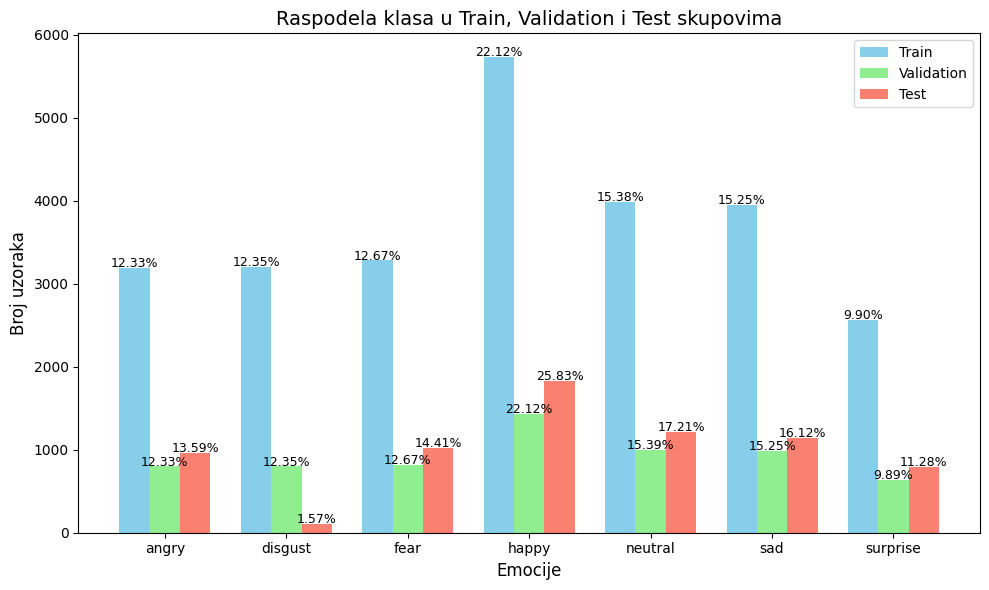

In [11]:
import matplotlib.pyplot as plt
import numpy as np

emotions = train_ds.class_names

train_values = [train_counts[cls] for cls in emotions]
val_values   = [val_counts[cls] for cls in emotions]
test_values  = [test_counts[cls] for cls in emotions]

train_perc_values = [train_perc[cls] for cls in emotions]
val_perc_values   = [val_perc[cls] for cls in emotions]
test_perc_values  = [test_perc[cls] for cls in emotions]

x = np.arange(len(emotions))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x - width, train_values, width, label='Train', color='skyblue')
ax.bar(x, val_values, width, label='Validation', color='lightgreen')
ax.bar(x + width, test_values, width, label='Test', color='salmon')

ax.set_xlabel('Emocije', fontsize=12)
ax.set_ylabel('Broj uzoraka', fontsize=12)
ax.set_title('Raspodela klasa u Train, Validation i Test skupovima', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(emotions)
ax.legend()

for i in range(len(emotions)):
    ax.text(x[i]-width, train_values[i]+10, train_perc_values[i], ha='center', fontsize=9)
    ax.text(x[i], val_values[i]+10, val_perc_values[i], ha='center', fontsize=9)
    ax.text(x[i]+width, test_values[i]+10, test_perc_values[i], ha='center', fontsize=9)

plt.tight_layout()
plt.show()

<h1>Prikaz skupa podataka</h1>

In [ ]:
def show_first_images_by_category_grayscale(dataset): 
    for images, labels in dataset.take(1):
        images = images.numpy()
        labels = labels.numpy()
        #class_names = train_ds.class_names
    
        first_of_class = {}  # prva slika po klasi
    
        for i in range(len(images)):
            class_index = np.argmax(labels[i])
            class_name = class_names[class_index]
    
            if class_name not in first_of_class:
                first_of_class[class_name] = images[i]
    
            if len(first_of_class) == len(class_names):
                break
    
        # broj klasa
        n_classes = len(class_names)
        fig, axes = plt.subplots(1, n_classes, figsize=(n_classes*2, 2))  # 1 red, n_classes kolona
    
        for ax, (class_name, image) in zip(axes, first_of_class.items()):
            ax.imshow(image.squeeze(), cmap='gray')  # squeeze ako je grayscale
            ax.set_title(class_name)
            ax.axis('off')
    
        plt.tight_layout()
        plt.show()

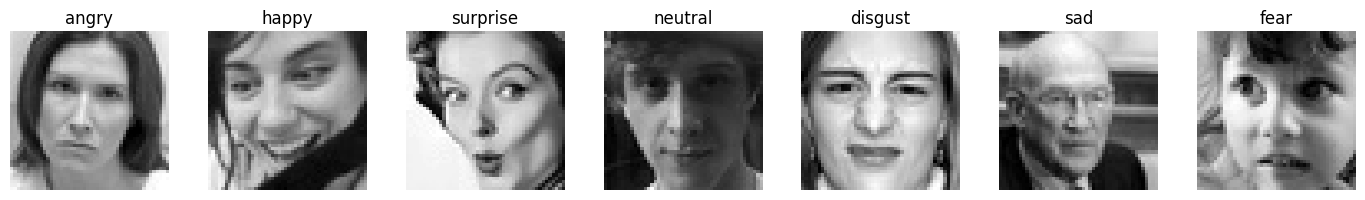

In [15]:
show_first_images_by_category_grayscale(train_ds)

Train set - Min pixel: 0.0, Max pixel: 255.0
Validation set - Min pixel: 0.0, Max pixel: 255.0
Test set - Min pixel: 0.0, Max pixel: 255.0


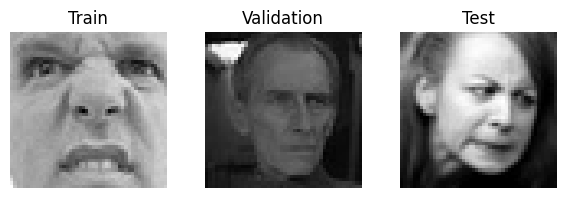

In [17]:
# Metoda koja prikazuje po 1 sliku iz train test i validation skupova
def show_first_images_in_row(train_ds, val_ds, test_ds):
    datasets = [train_ds, val_ds, test_ds]
    names = ["Train", "Validation", "Test"]
    images_to_show = []

    # uzmi prvu sliku iz svakog skupa
    for dataset, name in zip(datasets, names):
        for images, labels in dataset.take(1):
            image = images[0].numpy().squeeze()  # prva slika
            min_val = tf.reduce_min(images).numpy()
            max_val = tf.reduce_max(images).numpy()
            print(f"{name} set - Min pixel: {min_val}, Max pixel: {max_val}")
            images_to_show.append((image, name))

    # prikaz slika u jednom redu
    fig, axes = plt.subplots(1, len(images_to_show), figsize=(len(images_to_show)*2, 2))
    for ax, (image, name) in zip(axes, images_to_show):
        ax.imshow(image, cmap='gray')
        ax.set_title(name)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_first_images_in_row(train_ds, val_ds, test_ds)

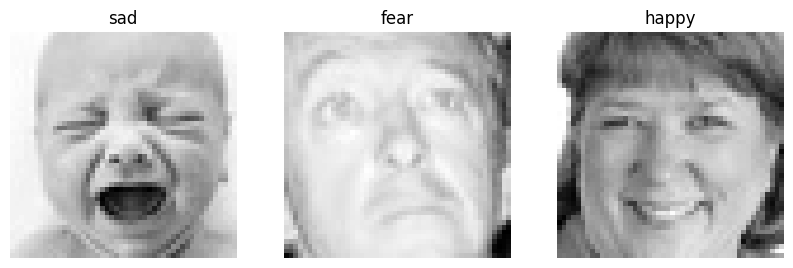

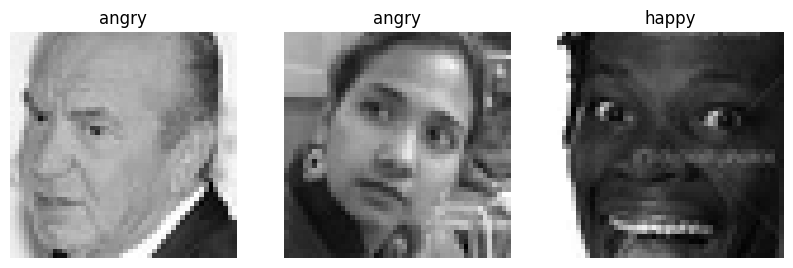

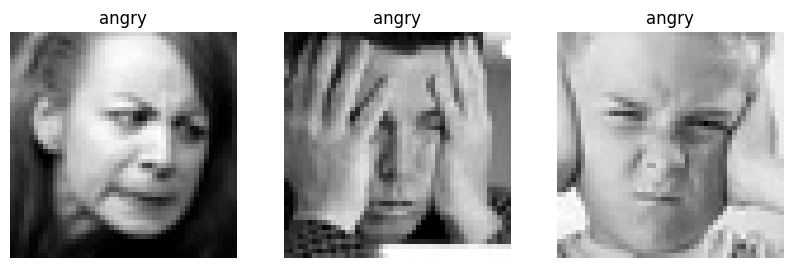

In [18]:
import matplotlib.pyplot as plt

train_class_names = train_ds.class_names
class_names = train_class_names
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):  
    for i in range(3): 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap="gray") 
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")

class_names = val_ds.class_names
plt.figure(figsize=(10, 10))

for images, labels in val_ds.take(1):  
    for i in range(3): 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap="gray") 
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")


class_names = test_class_names
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):  
    for i in range(3): 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap="gray") 
        plt.title(class_names[labels[i].numpy().argmax()])
        plt.axis("off")